<a href="https://colab.research.google.com/github/yc3855/Label-Noise/blob/main/CIFAR10_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#loading library
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
#checking shape
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
#define label
label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 
         'Frog', 'Horse', 'Ship', 'Truck']

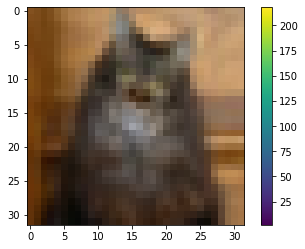

In [ ]:
#plot image no 26 in training data with colorbar
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

In [ ]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Transform label indices to one-hot encoded vectors

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [ ]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 3072)
(50000, 10)
Shape of test data:
(10000, 3072)
(10000, 10)


In [ ]:
#import library
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPool2D, Activation, MaxPooling2D

#Build Model
# model = Sequential()
# model.add(Conv2D(64,activation = 'relu', kernel_size = (3,3)))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3)))
# model.add(BatchNormalization())
# model.add(Flatten(input_shape = (32,32,3)))
# model.add(Dense(80, activation = 'relu'))
# model.add(Dense(10, activation = 'softmax'))

# #compliation of model
# model.compile(optimizer = 'adam', 
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])
              
              
# #fit model
# history = model.fit(X_train, y_train, epochs=10, verbose=1, 
#                   validation_split=0.3)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 12s - loss: 1.8739 - accuracy: 0.3156 - val_loss: 1.7783 - val_accuracy: 0.3606 - 12s/epoch - 10ms/step
Epoch 2/15
1250/1250 - 12s - loss: 1.7020 - accuracy: 0.3889 - val_loss: 1.6765 - val_accuracy: 0.4016 - 12s/epoch - 9ms/step
Epoch 3/15
1250/1250 - 12s - loss: 1.6149 - accuracy: 0.4159 - val_loss: 1.6858 - val_accuracy: 0.3913 - 12s/epoch - 9ms/step
Epoch 4/15
1250/1250 - 11s - loss: 1.5656 - accuracy: 0.4362 - val_loss: 1.6001 - val_accuracy: 0.4258 - 11s/epoch - 9ms/step
Epoch 5/15
1250/1250 - 11s - loss: 1.5252 - accuracy: 0.4485 - val_loss: 1.5631 - val_accuracy: 0.4404 - 11s/epoch - 9ms/step
Epoch 6/15
1250/1250 - 11s - loss: 1.4967 - accuracy: 0.4608 - val_loss: 1.5665 - val_accuracy: 0.4387 - 11s/epoch - 9ms/step
Epoch 7/15
1250/1250 - 11s - loss: 1.4702 - accuracy: 0.4674 - val_loss: 1.5228 - val_accuracy: 0.4566 - 11s/epoch - 9ms/step
Epoch 8/15
1250/1250 - 11s - loss: 1.4460 - accuracy: 0.4800 - val_loss: 1.5015 - val_accuracy: 0.4598 - 11s/epoch - 

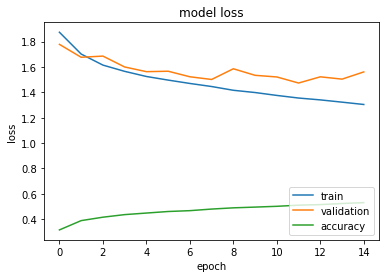

In [ ]:
#plot losses
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation', 'accuracy'], loc = 'lower right')
    plt.show()
    
plotloss(history)

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.5498486757278442, 0.4595000147819519]


In [ ]:
scores = np.array([])

for n in np.arange(2, 20, 2):
  model = Sequential()
  model.add(Dense(128 * n, activation='relu', input_dim=3072))
  model.add(Dense(10, activation='softmax'))
  #sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  model.fit(X_train,y_train, epochs=10, batch_size=32, verbose=2, validation_split=0.2)

  score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

  np.append(scores, score)

Epoch 1/10
1250/1250 - 11s - loss: 1.9104 - accuracy: 0.3217 - val_loss: 1.8719 - val_accuracy: 0.3239 - 11s/epoch - 9ms/step
Epoch 2/10
1250/1250 - 10s - loss: 1.7383 - accuracy: 0.3758 - val_loss: 1.7299 - val_accuracy: 0.3820 - 10s/epoch - 8ms/step
Epoch 3/10
1250/1250 - 9s - loss: 1.6786 - accuracy: 0.4004 - val_loss: 1.6717 - val_accuracy: 0.4073 - 9s/epoch - 7ms/step
Epoch 4/10
1250/1250 - 9s - loss: 1.6391 - accuracy: 0.4121 - val_loss: 1.6315 - val_accuracy: 0.4206 - 9s/epoch - 7ms/step
Epoch 5/10
1250/1250 - 9s - loss: 1.6162 - accuracy: 0.4202 - val_loss: 1.6533 - val_accuracy: 0.4099 - 9s/epoch - 7ms/step
Epoch 6/10
1250/1250 - 9s - loss: 1.5864 - accuracy: 0.4289 - val_loss: 1.6117 - val_accuracy: 0.4224 - 9s/epoch - 7ms/step
Epoch 7/10
1250/1250 - 10s - loss: 1.5714 - accuracy: 0.4381 - val_loss: 1.5881 - val_accuracy: 0.4327 - 10s/epoch - 8ms/step
Epoch 8/10
1250/1250 - 10s - loss: 1.5517 - accuracy: 0.4418 - val_loss: 1.5924 - val_accuracy: 0.4395 - 10s/epoch - 8ms/step


In [ ]:
np.append(scores, [1,2])

array([1., 2.])

In [ ]:
score

[1.533383846282959, 0.4632999897003174]

In [ ]:
np.append(scores, score)

array([1.53338385, 0.46329999])